導入套件

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

載入資料_訓練集：2014 年 ~ 2018 年的 TSEC（共 1231 天）

In [3]:
train = pd.read_csv("台指數/台灣加權指數2014-2018.csv")
train = train.fillna(0) #缺值得都補 0，等等int轉換才不會有問題
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,8618.599609,8632.809570,8587.540039,8612.540039,8612.507813,2537600.0
1,2014-01-03,8584.740234,8584.740234,8537.860352,8546.540039,8546.507813,2539700.0
2,2014-01-06,8553.000000,8568.240234,8488.639648,8500.009766,8499.977539,2640100.0
3,2014-01-07,8515.360352,8547.190430,8512.299805,8512.299805,8512.267578,2598900.0
4,2014-01-08,8548.610352,8587.080078,8548.610352,8556.009766,8555.977539,3206300.0


載入2019測試資料

In [4]:
test = pd.read_csv('台指數/台灣加權指數2019-2020.csv', usecols=[4], engine='python')
test.values

array([[ 9554.139648],
       [ 9492.419922],
       [ 9382.509766],
       [ 9590.299805],
       [ 9563.599609],
       [ 9738.30957 ],
       [ 9720.69043 ],
       [ 9759.400391],
       [ 9708.219727],
       [ 9806.040039],
       [ 9763.80957 ],
       [ 9789.150391],
       [ 9836.05957 ],
       [ 9889.400391],
       [ 9894.660156],
       [ 9846.400391],
       [ 9877.120117],
       [ 9969.610352],
       [10013.330078],
       [ 9931.589844],
       [ 9932.259766],
       [10004.25    ],
       [10097.740234],
       [10090.580078],
       [10089.009766],
       [10064.780273],
       [10145.280273],
       [10152.259766],
       [10272.459961],
       [10319.530273],
       [10322.919922],
       [10390.929688],
       [10391.549805],
       [10389.169922],
       [10349.879883],
       [10305.259766],
       [10357.150391],
       [10311.679688],
       [10241.75    ],
       [10250.280273],
       [10343.330078],
       [10373.320313],
       [10348.650391],
       [104

紅色的是收盤價、綠色的線是開盤價

C:\ProgramData\Anaconda3\envs\tf23\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


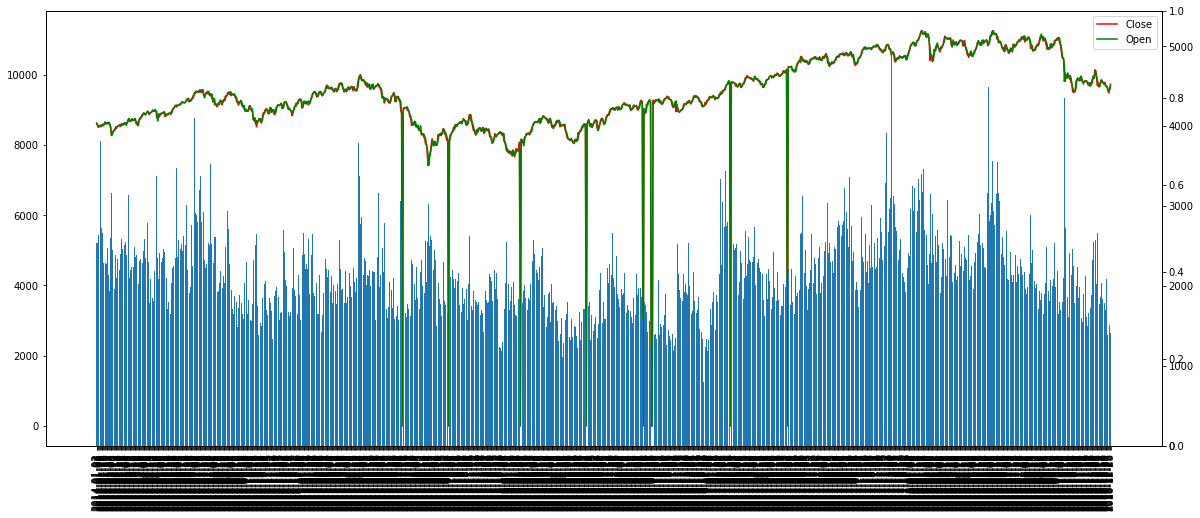

In [39]:
fig=plt.figure(figsize=(20,8))
plt.xticks(rotation = 90)  
ax1 = fig.add_subplot(111)
ax1.plot(train.Close,color='red',label='Close')
ax1.plot(train.Open,color='green',label='Open')
plt.legend()
# twin 為共享x軸
ax2= ax1.twinx()
plt.bar(train.Date ,train.Volume.astype('int')//1000)
ax3 = ax1.twinx()
#把圖片存檔
plt.savefig('TSEC_year.png')

In [12]:
#只要 Close那行資料
train_set = train['Close']
test_set = test['Close']
print(train_set)

0       8612.540039
1       8546.540039
2       8500.009766
3       8512.299805
4       8556.009766
           ...     
1226    9639.700195
1227    9527.089844
1228    9478.990234
1229    9641.559570
1230    9727.410156
Name: Close, Length: 1231, dtype: float64


將數據做歸一化(Normalization)

In [20]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler 

#做 Normalization，將資料壓縮在 [0,1] 之間
sc = MinMaxScaler(feature_range = (0, 1))
print(sc)

#需將資料做 reshape的動作，使其shape為(資料長度,1)，才使用 Normalization
#train_set= train_set.values.reshape(-1,1)
training_set_scaled = sc.fit_transform(train_set)
print(training_set_scaled)

MinMaxScaler()
[[0.76534751]
 [0.75948247]
 [0.75534759]
 ...
 [0.84234402]
 [0.85679064]
 [0.86441969]]


In [8]:
X_train = []   #預測點的前 10 天的資料
y_train = []   #預測點
for i in range(10,len(train_set)):
    X_train.append(training_set_scaled[i-10:i-1, 0]) 
    y_train.append(training_set_scaled[i, 0]) 
X_train, y_train = np.array(X_train), np.array(y_train)

#因為現在 X_train 是 2-dimension，
#將它 reshape 成 3-dimension: [stock prices, timesteps, indicators]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

print('第i天之前的股價')
print(X_train[0])
print('第i天股價')
print(y_train[0])

[[0.76534751 0.75948247 0.75534759 ... 0.75795485 0.76122956 0.75962462]
 [0.75948247 0.75534759 0.75643973 ... 0.76122956 0.75962462 0.76445974]
 [0.75534759 0.75643973 0.76032399 ... 0.75962462 0.76445974 0.76530933]
 ...
 [0.87233217 0.87609198 0.8685741  ... 0.8597196  0.85991069 0.8566254 ]
 [0.87609198 0.8685741  0.86976222 ... 0.85991069 0.8566254  0.84661836]
 [0.8685741  0.86976222 0.86365636 ... 0.8566254  0.84661836 0.84234402]] [0.76530933 0.7638777  0.76614903 ... 0.84234402 0.85679064 0.86441969]
第i天之前的股價
[[0.76534751]
 [0.75948247]
 [0.75534759]
 [0.75643973]
 [0.76032399]
 [0.75665122]
 [0.75795485]
 [0.76122956]
 [0.75962462]]
第i天股價
0.7653093307193404


In [43]:
#釋出GPU(這裡有問題)
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

In [44]:
# Import the Keras libraries and packages
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout,BatchNormalization

# Initialising the RNN
keras.backend.clear_session()
regressor = Sequential()

In [45]:
input_shape = (X_train.shape[1], 1)
print(input_shape)

(9, 1)


# 搭建 LSTM layer:

In [31]:
# 只用一層 LSTM 
regressor.add(LSTM(units = 100, input_shape = (X_train.shape[1], 1)))

# Adding the output layer setting 1
regressor.add(Dense(units = 1))

# Compiling
#regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
optimizer = keras.optimizers.Adam(lr=0.001)
regressor.compile(optimizer = optimizer, loss = 'mean_squared_error')

In [32]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


只使用一層LSTM層，訓練100個epoch，batch_size設為32，並劃出train loss

Epoch 1/100
39/39 [==============================] - 0s 2ms/step - loss: 0.1303
Epoch 2/100
39/39 [==============================] - 0s 2ms/step - loss: 0.0066
Epoch 3/100
39/39 [==============================] - 0s 2ms/step - loss: 0.0056
Epoch 4/100
39/39 [==============================] - 0s 2ms/step - loss: 0.0057
Epoch 5/100
39/39 [==============================] - 0s 2ms/step - loss: 0.0056
Epoch 6/100
39/39 [==============================] - 0s 2ms/step - loss: 0.0057
Epoch 7/100
39/39 [==============================] - 0s 2ms/step - loss: 0.0057
Epoch 8/100
39/39 [==============================] - 0s 2ms/step - loss: 0.0059
Epoch 9/100
39/39 [==============================] - 0s 2ms/step - loss: 0.0056
Epoch 10/100
39/39 [==============================] - 0s 2ms/step - loss: 0.0056
Epoch 11/100
39/39 [==============================] - 0s 2ms/step - loss: 0.0057
Epoch 12/100
39/39 [==============================] - 0s 2ms/step - loss: 0.0057
Epoch 13/100
39/39 [=================

TypeError: 'History' object is not subscriptable

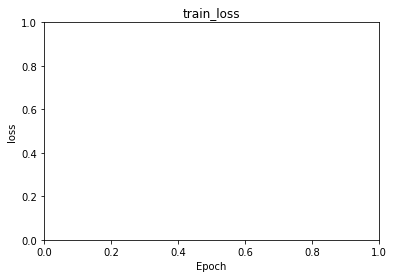

In [33]:
history = regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)
plt.title('train_loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.plot( history.history["loss"])

In [22]:
dataset_total = pd.concat((train['Close'], test['Close']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test) - 10:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(10, len(inputs)):
    X_test.append(inputs[i-10:i-1, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
#使用sc的 inverse_transform將股價轉為歸一化前
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
#看前10筆資料
predicted_stock_price[:10]

array([[0.00000000e+00, 2.42763662e+00, 4.03210856e-02, 0.00000000e+00,
        0.00000000e+00, 2.79841785e+01, 0.00000000e+00, 5.33303223e+01,
        5.84527016e-01, 6.81784570e-01, 0.00000000e+00, 3.43408295e+02,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.16885805e-02,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.58718781e+02,
        2.10201675e+02, 3.23873474e+02, 0.00000000e+00, 1.55545090e+02,
        0.00000000e+00, 0.00000000e+00, 1.11105019e+02, 1.54579544e+02,
        0.00000000e+00, 0.00000000e+00, 3.50090759e+02, 3.24067810e+02,
        1.14809891e+02, 1.37687546e+02, 2.20532990e+02, 0.00000000e+00,
        0.00000000e+00, 6.59909439e+01, 5.51460013e-02, 0.00000000e+00,
        0.00000000e+00, 3.63891907e+01, 0.00000000e+00, 4.77260681e+02,
        3.29526306e+02, 4.57447195e+00, 5.53610535e+02, 0.00000000e+00,
        2.29086578e+02, 1.98495316e+02],
       [0.00000000e+00, 2.42361379e+00, 3.98623981e-02, 0.00000000e+00,
        0.00000000e+00,

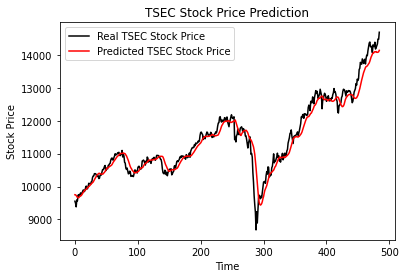

In [16]:
plt.plot(test['Close'].values, color = 'black', label = 'Real TSEC Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted TSEC Stock Price')
plt.title('TSEC Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()